# 1. Геометрические характеристики бинарных изображений

In [136]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [137]:
img = cv2.imread('image.jpg',0)
ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0] # создание массива точек контура

### Площадь, ограниченная контуром

In [138]:
area = cv2.contourArea(cnt)
area

751773.0

### Длина контурного периметра

In [139]:
cv2.arcLength(cnt, 1)

3652.0

### Моменты

In [140]:
cv2.moments(cnt)

{'m00': 751773.0,
 'm10': 450687913.5,
 'm01': 235680835.5,
 'm20': 360249872191.0,
 'm11': 141290660882.25,
 'm02': 98514589239.0,
 'm30': 323954697567756.75,
 'm21': 112938334931878.5,
 'm12': 59059496248780.5,
 'm03': 46326485589639.75,
 'mu20': 90062468047.75,
 'mu11': 0.0,
 'mu02': 24628647309.75,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.15935672514619884,
 'nu11': 0.0,
 'nu02': 0.04357798165137615,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

### Отношение ширины к высоте ограничивающего прямоугольника

In [141]:
x, y, w, h = cv2.boundingRect(cnt)
float(w)/h

1.910828025477707

### Отношение площади контура к площади ограничивающего прямоугольника

In [142]:
arr = w * h
ar = cv2.contourArea(cnt)
extent = float(arr) / ar
extent

1.0024302548774697

### Эквивалентный диаметр

In [143]:
ar = cv2.contourArea(cnt)
eqdiam = np.sqrt(4*ar / np.pi)
eqdiam

978.3593983113708

## Задание 1

Вычислить площадь s, периметр р, ширину w, высоту h, отношение ширины к высоте w/h, отношение площади изображения к площади описывающего прямоугольника s/(wh), эквивалентный диаметр, центр масс, моменты бинарного изображения.


In [144]:
img = cv2.imread('image.jpg', 0)
imag = cv2.imread('image.jpg', 0)

In [145]:
ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)

# Создание контура
cnt = contours[0]

In [146]:
# Вычисление площади
ar = cv2.contourArea(cnt)
print("Площадь: ", ar)

Площадь:  751773.0


In [147]:
# Вычисление периметра
prm = cv2.arcLength(cnt, True)
print("Периметра: ", prm)

Периметра:  3652.0


In [148]:
# Вычисление моментов
M = cv2.moments(cnt)
print("Моменты: ", M)

Моменты:  {'m00': 751773.0, 'm10': 450687913.5, 'm01': 235680835.5, 'm20': 360249872191.0, 'm11': 141290660882.25, 'm02': 98514589239.0, 'm30': 323954697567756.75, 'm21': 112938334931878.5, 'm12': 59059496248780.5, 'm03': 46326485589639.75, 'mu20': 90062468047.75, 'mu11': 0.0, 'mu02': 24628647309.75, 'mu30': 0.0, 'mu21': 0.0, 'mu12': 0.0, 'mu03': 0.0, 'nu20': 0.15935672514619884, 'nu11': 0.0, 'nu02': 0.04357798165137615, 'nu30': 0.0, 'nu21': 0.0, 'nu12': 0.0, 'nu03': 0.0}


In [149]:
x, y, w, h = cv2.boundingRect(cnt)
print("x, y, w, h: ", x, y, w, h)

x, y, w, h:  0 0 1200 628


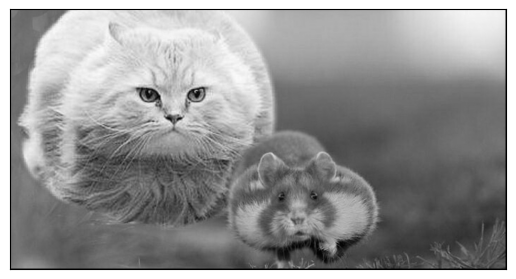

In [150]:
imag = cv2.rectangle(imag, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(imag, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.show()

In [151]:
asprat = float(w) / h # соотношение сторон
rectar = w * h
extent = float(ar) / rectar
eqdiam = np.sqrt(4*ar / np.pi)

print("Ширина: ", w, ", Высота: ", h)
print("Отношение ширины к высоте: ", asprat)
print("Отношение s/(wh): ", extent)
print("Эквивалентный диаметр: ", eqdiam)

Ширина:  1200 , Высота:  628
Отношение ширины к высоте:  1.910828025477707
Отношение s/(wh):  0.9975756369426751
Эквивалентный диаметр:  978.3593983113708


# 2. Характерные параметры бинарных изображений

### Маска и пиксельные точки

In [152]:
img = cv2.imread("image.jpg", 0)
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoints = np.transpose(np.nonzero(mask))
pixpoints = cv2.findNonZero(mask)

### Максимальное и минимальное значения и их координаты

In [153]:
minval, maxval, minloc, maxloc = cv2.minMaxLoc(img, mask=mask)

print(minval, maxval, minloc, maxloc)

0.0 251.0 (332, 200) (242, 78)


### Крайние точки

In [154]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(leftmost, rightmost, topmost, bottommost)

(0, 0) (1199, 0) (0, 0) (1199, 627)


### Средняя интенсивность

In [155]:
mean_val = cv2.mean(img,mask = mask)
mean_val

(137.82317277070064, 0.0, 0.0, 0.0)

### Ориентация

In [156]:
img = cv2.imread('image2.jpg',0)

ret,thresh = cv2.threshold(img,0,255,0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

(x, y), (MA, ma), ang = cv2.fitEllipse(cnt)
print(ang)

179.7482147216797


## Задание 2

Используя изображение маски определить крайние 
точки, минимальное и максимальное значения и их координаты для 
бинарного изображения. Найти среднюю интенсивность изображения в градациях серого, ориентацию бинарного изображения с выделенной осью

In [157]:
img = cv2.imread('image2.jpg', 0)

ret, thresh = cv2.threshold(img, 0, 255, 0)
contours, hierarchy = cv2.findContours(thresh, 5, 5)
cnt = contours[0]

In [158]:
mask = np.zeros(img.shape, np.uint8)

cv2.drawContours(mask, [cnt], 0, 255, -1)
pixpoin = np.transpose(np.nonzero(mask))
minv, maxv, minl, maxl = cv2.minMaxLoc(img, mask=mask)

In [159]:
# Крайние точки
leftmost = tuple(cnt[cnt[:, :, 0].argmin()][0])
rightmost = tuple(cnt[cnt[:, :, 0].argmax()][0])
topmost = tuple(cnt[cnt[:, :, 1].argmin()][0])
bottommost = tuple(cnt[cnt[:, :, 1].argmax()][0])

In [160]:
(x,y),(MA,ma),ang=cv2.fitEllipse(cnt)
meanv = cv2.mean(img,mask = mask)

In [161]:
print("Пиксельные точки:\n", pixpoin)
print("Максимальное и минимальное значения и их координаты: ",
      minv, maxv, minl, maxl)
print("Крайние точки: ", leftmost, rightmost, topmost, bottommost)
print("Средняя интенсивность: ", meanv)
print("Ориентация: ", ang)

Пиксельные точки:
 [[   0    0]
 [   0    1]
 [   0    2]
 ...
 [1799 2877]
 [1799 2878]
 [1799 2879]]
Максимальное и минимальное значения и их координаты:  0.0 255.0 (2304, 0) (1722, 55)
Крайние точки:  (0, 0) (2879, 1) (0, 0) (2879, 1799)
Средняя интенсивность:  (65.55186491708939, 0.0, 0.0, 0.0)
Ориентация:  179.7482147216797
